In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\pokemon.csv')
##The goal of this project is to use kmeans clustering to identify the different types of pokemon.
#For this exercise, we will exclude the pokemon type category so we can focus more on attack, defense, special attack, and speed
#The data was scraped from https://pokemondb.net/pokedex/all?source=post_page---------------------------
# and the webscraping project was found at https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#Side Note: Personally, I am not very familiar with the pokemon after 300 so some summaries will just have the red/blue 
#pokemon listed in them.

In [3]:
df.columns
#Name: The name of the pokemon
#Type: The type(water, grass, fire, poison, etc.)
#Total: The total number of base stats)
#HP: Health

Index(['Unnamed: 0', '#', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype='object')

In [25]:
df1 = df[['Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

In [26]:
df1.head()
#Concerns:
#The biggest concern going into the clustering exercise is the evolution problem.  For instance, Bulbasaur evolves into
#Ivysaur so an Ivysaur is basically just a Bulbasaur with higher stats.
#Because of this, it is very possible that the algorithm could just group the pokemon into unevolved, middle, and fully 
#evolved groups which wouldn't help us too much because we already know it is better to have an Ivysaur than a Bulbasaur
#(otherwise there would be no need to evolve pokemon)

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,GrassPoison,318,45,49,49,65,65,45
1,Ivysaur,GrassPoison,405,60,62,63,80,80,60
2,Venusaur,GrassPoison,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,GrassPoison,625,80,100,123,122,120,80
4,Charmander,Fire,309,39,52,43,60,50,65


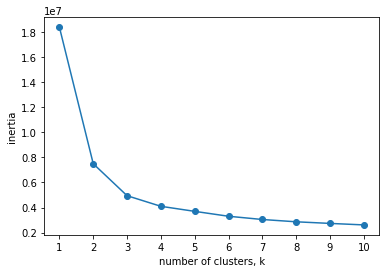

In [27]:
#Now that we know what we want to do and what we want to avoid, let's determine the ideal number of clusters.

ks = range(1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df1.iloc[:, 2:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
#It looks like there are 3 different types (Let's see if our concern was correct)

In [29]:
cluster = KMeans(n_clusters=3)
df1['cluster'] = cluster.fit_predict(df1.iloc[:, 2:])
df1['cluster'].value_counts()

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    456
0    319
2    151
Name: cluster, dtype: int64

In [44]:
cluster0 = df1[df1['cluster'] == 0]
cluster1 = df1[df1['cluster'] == 1]
cluster2 = df1[df1['cluster'] == 2]

In [45]:
cluster0.to_csv('C:\\Users\\tilleymusprime\\Desktop\\pokemoncluster0.csv')
cluster1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\pokemoncluster1.csv')
cluster2.to_csv('C:\\Users\\tilleymusprime\\Desktop\\pokemoncluster2.csv')

In [46]:
#After looking through the spreadsheets, it looks like our intial concern was correct.
#The first cluster (cluster 0) seems to consist of the most powerful pokemon (both fully evolved and the rare ones)
#The second cluster (cluster 1) seems to consist of midlevel pokemon and the second evolution phase of 3 stage pokemon
#(Sorry Machamp and Victreebell fans)

#To fix this issue, we will re-run the clustering scenario but this time just for cluster 0.
#We want to use cluster 0 because that is when each pokemon is most defined stat wise

cluster2.columns

Index(['Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'cluster'],
      dtype='object')

In [47]:
newdf = cluster2[['Name', 'Type', 'Total', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
#Now that we've removed the cluster number from cluster 0, we will re-run our clustering algorithm and see what happens

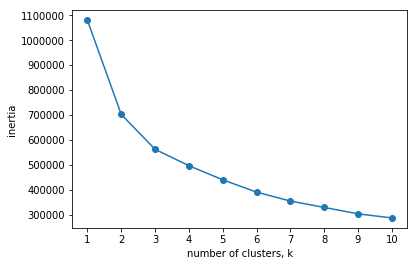

In [48]:
ks = range(1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(newdf.iloc[:, 2:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
#Let's try 3 clusters first and see what we get

In [49]:
cluster = KMeans(n_clusters=3)
newdf['cluster'] = cluster.fit_predict(newdf.iloc[:, 2:])
newdf['cluster'].value_counts()

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    70
2    42
1    39
Name: cluster, dtype: int64

In [50]:
cluster01 = newdf[newdf['cluster'] == 0]
cluster11 = newdf[newdf['cluster'] == 1]
cluster21 = newdf[newdf['cluster'] == 2]

In [51]:
cluster01.describe()

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,590.628571,108.171429,79.257143,119.957143,90.057143,109.114286,0.0
std,20.062346,27.177874,16.370427,25.830235,23.288914,22.627765,0.0
min,550.000000,50.000000,20.000000,54.000000,20.000000,43.000000,0.0
25%,580.000000,90.000000,70.000000,100.000000,80.000000,100.000000,0.0
50%,600.000000,104.500000,80.000000,122.500000,90.000000,104.000000,0.0
75%,600.000000,127.750000,90.000000,135.000000,100.000000,121.000000,0.0
max,640.000000,180.000000,111.000000,180.000000,154.000000,180.000000,0.0


In [52]:
cluster11.describe()

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,699.025641,138.282051,107.564103,134.025641,109.435897,99.692308,1.0
std,34.160216,25.781418,21.072300,28.717762,21.170728,15.786660,0.0
min,660.000000,90.000000,60.000000,80.000000,65.000000,71.000000,1.0
25%,680.000000,120.000000,92.500000,113.000000,95.000000,90.000000,1.0
50%,680.000000,137.000000,100.000000,131.000000,100.000000,95.000000,1.0
75%,700.000000,160.000000,120.000000,154.000000,120.000000,110.000000,1.0
max,780.000000,190.000000,160.000000,194.000000,160.000000,140.000000,1.0


In [53]:
cluster21.describe()

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.0
mean,595.285714,115.190476,129.857143,91.476190,107.333333,69.023810,2.0
std,19.616178,32.061859,34.211374,29.833062,28.625987,25.386273,0.0
min,560.000000,50.000000,95.000000,40.000000,31.000000,13.000000,2.0
25%,580.000000,95.000000,109.250000,66.250000,95.000000,50.000000,2.0
50%,600.000000,110.000000,120.000000,92.500000,105.000000,75.000000,2.0
75%,600.000000,138.000000,137.000000,106.500000,118.750000,85.000000,2.0
max,640.000000,185.000000,230.000000,165.000000,200.000000,110.000000,2.0


In [54]:
#After looking at the summary statistics above, it looks like cluster 0 is the cluster for high speed pokemon
#Cluster 1 has higher attack, defense, special attack, and special defense
#Cluster 2 seems to be the slower pokemon but they have higher attack and defense than cluster 0 but lower special attack
#Cluster 2 also seems to have a higher defense than both cluters.  
#For example, the minimum defense for cluster 2 is greater than 75%  of the pokemon in cluster 0 and is still better than
# the bottom 25% of cluster 1


#To get further insights and see what pokemon belong to which cluster, lets take a look at the spreadsheets
##cluster01.to_csv('C:\\Users\\tilleymusprime\\Desktop\\c0pokemoncluster0.csv')
##cluster11.to_csv('C:\\Users\\tilleymusprime\\Desktop\\c0pokemoncluster1.csv')
##cluster21.to_csv('C:\\Users\\tilleymusprime\\Desktop\\c0pokemoncluster2.csv')

In [55]:
#Cluster 0 (Speed pokemon): Charizard, Pidgeot, Arcanine, Alakazaam, Gengar, Aerodactyl, Zapdos, Moltres,
#Mew, Houndoom, Raikou, Entei

#Cluster 1 (High-Attack): Mewtwo, Tyranitar, Lugia, Ho-oh.
#It looks like this cluster focuses more on later pokemon than the original games

#Cluster 2 (High-Defense, high attack, low-speed): Venusaur, Blastoise, Slowbro, Kangaskhan, Gyrados, Articuno, Dragonite

#Let's take a look and also see if type plays a factor in how a pokemon develops

cluster01['Type'].value_counts()

Psychic           7
Electric          4
ElectricFlying    3
WaterFighting     2
Dark              2
FireFlying        2
PsychicFairy      2
WaterDark         2
GroundFlying      2
NormalFighting    2
RockFlying        2
Fire              2
Flying            2
DragonPsychic     2
DarkDragon        2
FightingSteel     1
Grass             1
Ghost             1
FireSteel         1
PsychicGhost      1
BugSteel          1
Water             1
Fairy             1
RockFighting      1
GrassFlying       1
Normal            1
SteelPsychic      1
BugFire           1
DarkFire          1
FightingGhost     1
GrassDragon       1
Ice               1
PsychicFire       1
RockPoison        1
BugFighting       1
FireFighting      1
FireDragon        1
NormalPsychic     1
DragonGround      1
GhostPoison       1
NormalFlying      1
PsychicGrass      1
FireGhost         1
GrassFighting     1
ElectricFairy     1
Dragon            1
DragonFlying      1
Name: Type, dtype: int64

In [56]:
cluster11['Type'].value_counts()

DragonFlying       3
Normal             3
DragonIce          3
Psychic            2
GhostDragon        2
Water              2
PsychicSteel       2
DragonPsychic      2
DragonGround       2
PsychicGhost       2
PsychicFlying      1
SteelPsychic       1
RockFairy          1
GroundFire         1
PsychicDragon      1
DarkFlying         1
PsychicDark        1
RockDark           1
Fairy              1
FireFlying         1
PsychicFighting    1
SteelDragon        1
Ground             1
WaterDragon        1
DragonElectric     1
DragonFire         1
Name: Type, dtype: int64

In [58]:

cluster21['Type'].value_counts()

Psychic            4
Steel              3
Water              3
BugFighting        2
DragonFairy        1
RockFairy          1
RockDark           1
FireGround         1
Rock               1
RockSteel          1
DragonFighting     1
GrassIce           1
SteelGround        1
WaterPsychic       1
GrassSteel         1
SteelFairy         1
SteelPsychic       1
DragonGround       1
GrassFairy         1
WaterFairy         1
FireWater          1
GrassPoison        1
SteelFlying        1
PsychicFighting    1
BugFlying          1
ElectricDragon     1
WaterGround        1
BugSteel           1
IceFlying          1
WaterDark          1
SteelFighting      1
Normal             1
Ice                1
DragonFlying       1
Name: Type, dtype: int64

In [ ]:
##Psychic pokemon appear to be the most versatile as they have multiple entries in each cluster